In [1]:
# import scenario properties from pickle
import pickle

with open('scenario-properties-baseline.pkl', 'rb') as f:
    scenario_properties = pickle.load(f)

In [4]:
import os
# import x0 file from pyssem/utils/launch/data
path = os.path.join('pyssem', 'utils', 'launch', 'data', 'x0_elliptical.csv')
path_x0 = os.path.join('pyssem', 'utils', 'launch', 'data', 'x0.csv')

import pandas as pd
df = pd.read_csv(path)
x0 = pd.read_csv(path_x0)


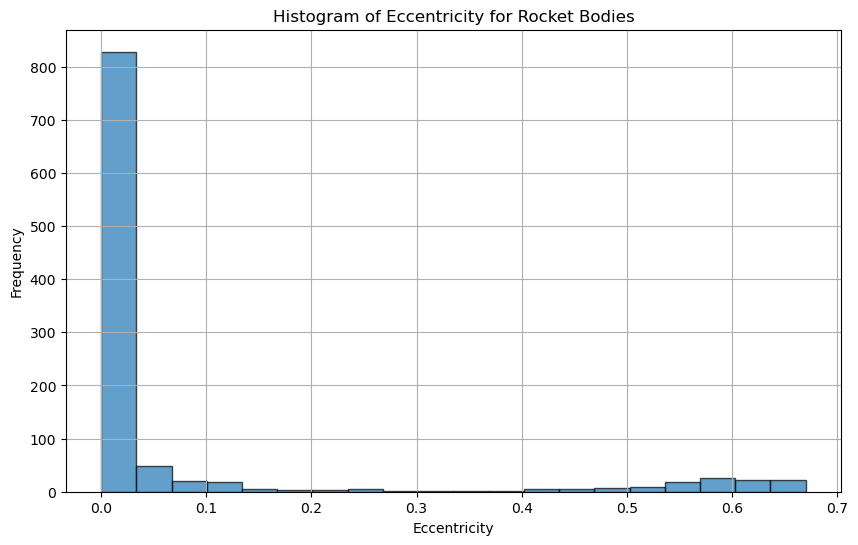

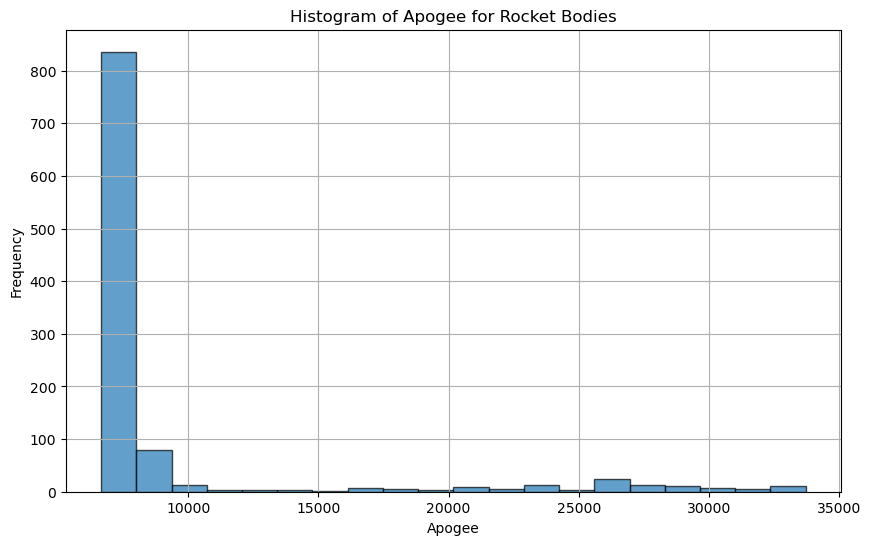

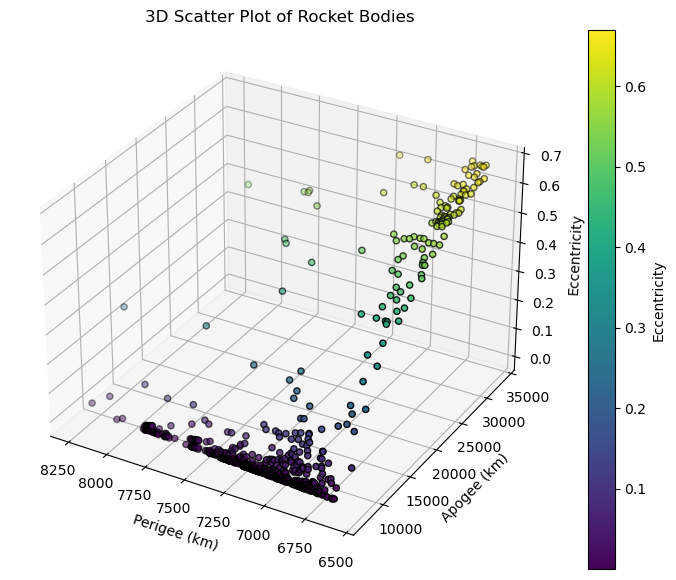

In [14]:
rocket_body_data = x0[x0['species_class'] == 'B']

# Create the histogram for eccentricity
plt.figure(figsize=(10, 6))
plt.hist(rocket_body_data['ecc'], bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Eccentricity')
plt.ylabel('Frequency')
plt.title('Histogram of Eccentricity for Rocket Bodies')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(rocket_body_data['apogee'], bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Apogee')
plt.ylabel('Frequency')
plt.title('Histogram of Apogee for Rocket Bodies')
plt.grid(True)
plt.show()

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Assuming rocket_body_data is your DataFrame and contains 'apogee', 'perigee', and 'ecc' columns

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for apogee, perigee, and eccentricity
sc = ax.scatter(rocket_body_data['perigee'], rocket_body_data['apogee'], rocket_body_data['ecc'], c=rocket_body_data['ecc'], cmap='viridis', edgecolor='k')

perigee_limits = ax.get_xlim()
ax.set_xlim(perigee_limits[1], perigee_limits[0])

# Labeling the axes
ax.set_xlabel('Perigee (km)')
ax.set_ylabel('Apogee (km)')
ax.set_zlabel('Eccentricity')

# Title
ax.set_title('3D Scatter Plot of Rocket Bodies')

# Color bar to represent the eccentricity values
cbar = fig.colorbar(sc)
cbar.set_label('Eccentricity')

plt.show()

Filtered Rocket Body Data:
           sma       ecc
2057  8315.964  0.166247
2058  8815.994  0.202761
2059  7128.259  0.022895
2060  7970.132  0.011404
2061  7439.333  0.018902


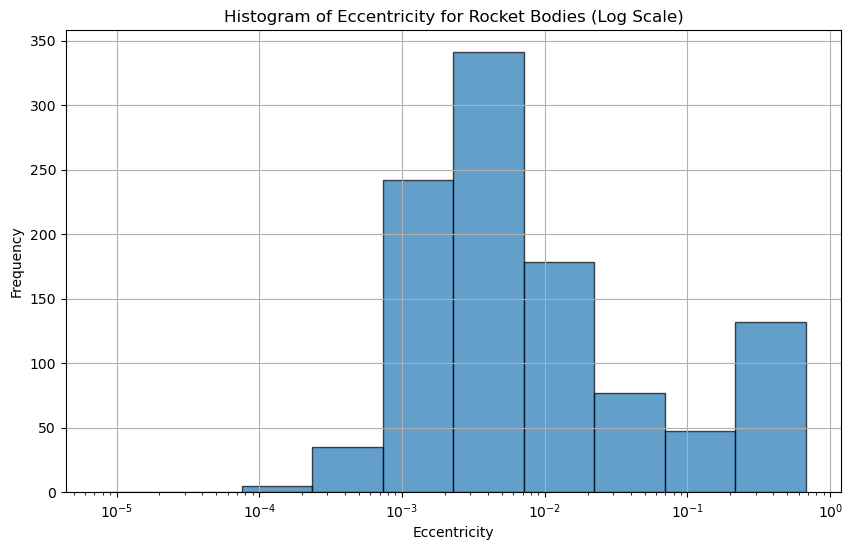

C:\Users\IT\AppData\Local\Temp\ipykernel_17372\1720422757.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rocket_body_data['a_bin'] = rocket_body_data['sma'].apply(lambda sma: find_bin_index(semi_major_axis_bins, sma))
C:\Users\IT\AppData\Local\Temp\ipykernel_17372\1720422757.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rocket_body_data['e_bin'] = rocket_body_data['ecc'].apply(lambda ecc: find_bin_index(eccentricity_bins, ecc))


Binned Rocket Body Data:
           sma       ecc  a_bin  e_bin
2057  8315.964  0.166247      4      8
2058  8815.994  0.202761      5      8
2059  7128.259  0.022895      1      7
2060  7970.132  0.011404      3      6
2061  7439.333  0.018902      2      6
Eccentricity bins: [7.80010000e-06 2.43049196e-05 7.57335314e-05 2.35983820e-04
 7.35319776e-04 2.29123833e-03 7.13944223e-03 2.22463263e-02
 6.93190053e-02 2.15996314e-01 6.73039200e-01]
Semi-major axis bins: [ 6590.633       6972.02276975  7375.48297741  7802.29080521
  8253.79734392  8731.43186985  9236.70636934  9771.22032505
 10336.66577922 10934.83268997 11567.61459754 12237.01461843
 12945.1517864  13694.26776042 14486.7339208  15325.058876
 16211.89640376 17150.05385186 18142.50102495 19192.37958571
 20303.013     ]
Rocket Body Eccentricity Range: 0.0001551 0.6697685
Rocket Body Semi-major Axis Range: 6656.001 20207.459
Rocket Body Matrix:
    0  1  2   3    4    5   6   7   8   9
0   0  0  2   8   35   50  36   7   0   0
1

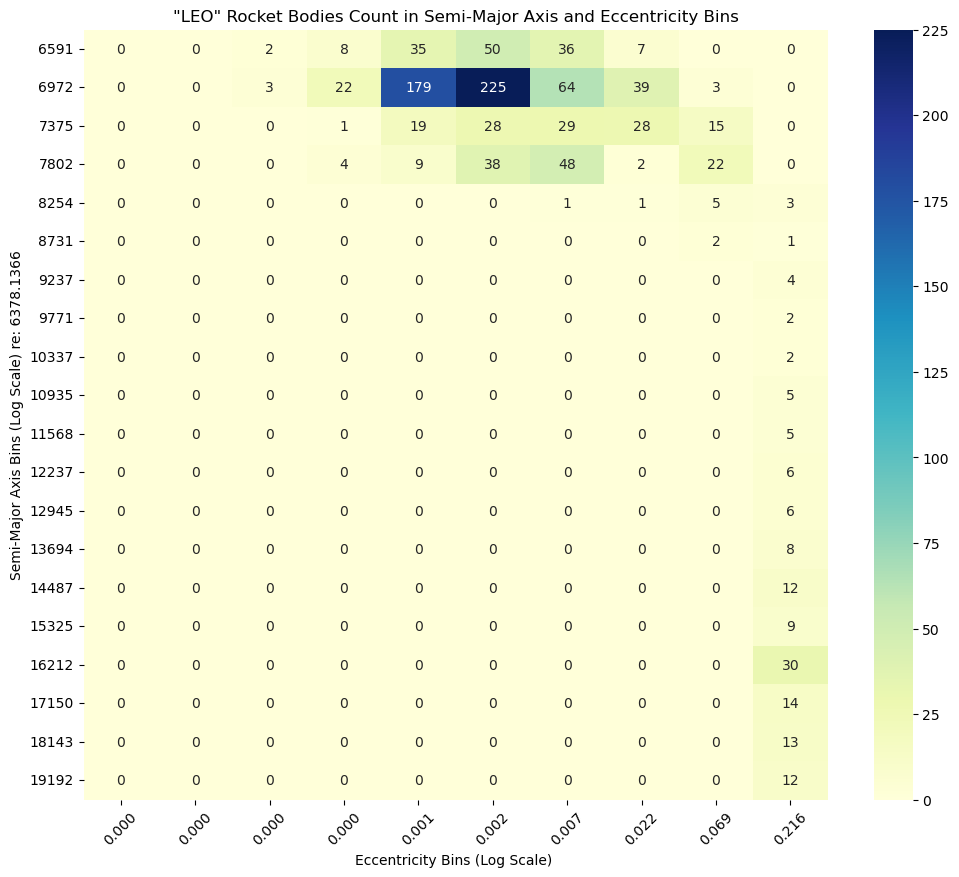

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming x0 is your DataFrame
# x0 = pd.read_csv('path_to_your_csv_file.csv')  # Uncomment this line if you need to load the DataFrame from a CSV file

# Define the non-linear bins
semi_major_axis_min = x0['sma'].min()
semi_major_axis_max = x0['sma'].max()
eccentricity_min = x0['ecc'].min()
eccentricity_max = x0['ecc'].max()

# Create non-linear spreads of bins using a logarithmic scale
semi_major_axis_bins = np.logspace(np.log10(semi_major_axis_min), np.log10(semi_major_axis_max), num=21)
eccentricity_bins = np.logspace(np.log10(eccentricity_min + 1e-10), np.log10(eccentricity_max), num=11)  # Adding a small value to avoid log(0)

n_a_bins = len(semi_major_axis_bins) - 1
n_e_bins = len(eccentricity_bins) - 1

# Filter the DataFrame for species_class 'B'
rocket_body_data = x0[x0['species_class'] == 'B']

# Debug: Check filtered data
print("Filtered Rocket Body Data:")
print(rocket_body_data[['sma', 'ecc']].head())

# Create the histogram for eccentricity with non-linear bins
plt.figure(figsize=(10, 6))
plt.hist(rocket_body_data['ecc'], bins=eccentricity_bins, edgecolor='black', alpha=0.7)
plt.xscale('log')
plt.xlabel('Eccentricity')
plt.ylabel('Frequency')
plt.title('Histogram of Eccentricity for Rocket Bodies (Log Scale)')
plt.grid(True)
plt.show()

def find_bin_index(bin_edges, value):
    """Find the index of the bin a value belongs to."""
    for i in range(len(bin_edges) - 1):
        if bin_edges[i] <= value < bin_edges[i + 1]:
            return i
    return len(bin_edges) - 2 if value == bin_edges[-1] else -1  # Handle edge case

# Bin the data
rocket_body_data['a_bin'] = rocket_body_data['sma'].apply(lambda sma: find_bin_index(semi_major_axis_bins, sma))
rocket_body_data['e_bin'] = rocket_body_data['ecc'].apply(lambda ecc: find_bin_index(eccentricity_bins, ecc))

# Debug: Check binned data
print("Binned Rocket Body Data:")
print(rocket_body_data[['sma', 'ecc', 'a_bin', 'e_bin']].head())

# Additional debug to check the range of values
print("Eccentricity bins:", eccentricity_bins)
print("Semi-major axis bins:", semi_major_axis_bins)
print("Rocket Body Eccentricity Range:", rocket_body_data['ecc'].min(), rocket_body_data['ecc'].max())
print("Rocket Body Semi-major Axis Range:", rocket_body_data['sma'].min(), rocket_body_data['sma'].max())

# Initialize the matrix with zeroes
rocket_body_matrix = pd.DataFrame(0, index=range(n_a_bins), columns=range(n_e_bins))

# Populate the matrix
for idx, row in rocket_body_data.iterrows():
    a_idx = row['a_bin']
    e_idx = row['e_bin']
    if a_idx != -1 and e_idx != -1:
        rocket_body_matrix.at[a_idx, e_idx] += 1

# Debug: Check the populated matrix
print("Rocket Body Matrix:")
print(rocket_body_matrix)

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(rocket_body_matrix, annot=True, fmt="d", cmap="YlGnBu", 
            xticklabels=[f"{ecc:.3f}" for ecc in eccentricity_bins[:-1]], 
            yticklabels=[f"{sma:.0f}" for sma in semi_major_axis_bins[:-1]])
plt.xlabel(f'Eccentricity Bins (Log Scale) ')
plt.ylabel(f'Semi-Major Axis Bins (Log Scale) re: {scenario_properties.re}')
plt.title('"LEO" Rocket Bodies Count in Semi-Major Axis and Eccentricity Bins')
plt.xticks(rotation=45)
plt.show()


# Eliptical Orbits propagation

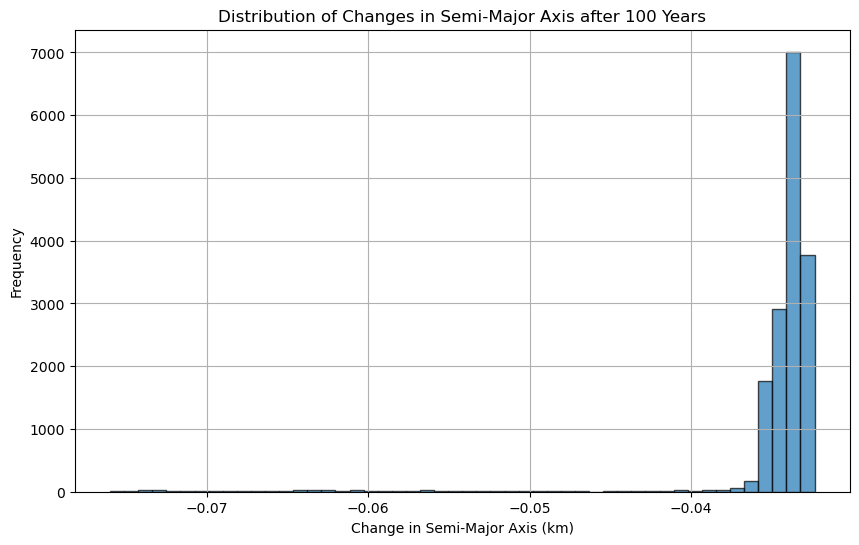

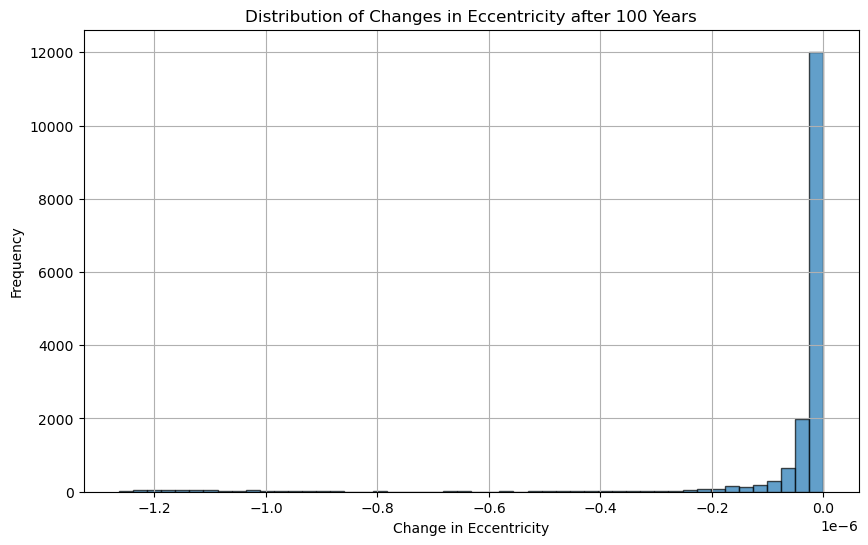

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming x0 is your DataFrame
# x0 = pd.read_csv('path_to_your_csv_file.csv')  # Uncomment this line if you need to load the DataFrame from a CSV file

# Define constants
deg = np.pi / 180
hours = 3600
days = 24 * hours
years = 365.25 * days


# Time span
propagation_time_years = 100
propagation_time_seconds = propagation_time_years * years

# Initialize lists to store differences
delta_sma = []
delta_ecc = []

# Propagation function
def propagate_orbit(input_oe, param, time_step):
    param['t'] = param['t_0'] + time_step
    out_oe, errors = analytic_prop_vec_MOD(input_oe, param)
    if not errors[0]:
        return out_oe[0]
    else:
        return input_oe[0]  # Return original if there was an error

# Iterate through each row in the DataFrame
for idx, row in x0.iterrows():
    sma = row['sma']
    ecc = row['ecc']
    inc = row.get('inc', 30 * deg)  # Example inclination, replace with actual data if available
    raan = row.get('raan', 40 * deg)  # Example RAAN, replace with actual data if available
    aop = row.get('aop', 60 * deg)  # Example argument of perigee, replace with actual data if available
    ma = row.get('ma', 0 * deg)  # Example mean anomaly, replace with actual data if available
    
    input_oe = np.array([[sma, ecc, inc, raan, aop, ma]])
    new_oe = propagate_orbit(input_oe, param, propagation_time_seconds)
    
    delta_sma.append(new_oe[0] - sma)
    delta_ecc.append(new_oe[1] - ecc)

# Create a DataFrame to store the differences
differences = pd.DataFrame({
    'delta_sma': delta_sma,
    'delta_ecc': delta_ecc
})

# Plot the differences in semi-major axis
plt.figure(figsize=(10, 6))
plt.hist(differences['delta_sma'], bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Change in Semi-Major Axis (km)')
plt.ylabel('Frequency')
plt.title('Distribution of Changes in Semi-Major Axis after 100 Years')
plt.grid(True)
plt.show()

# Plot the differences in eccentricity
plt.figure(figsize=(10, 6))
plt.hist(differences['delta_ecc'], bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Change in Eccentricity')
plt.ylabel('Frequency')
plt.title('Distribution of Changes in Eccentricity after 100 Years')
plt.grid(True)
plt.show()

C:\Users\IT\AppData\Local\Temp\ipykernel_17372\558831636.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rocket_body_data['a_bin'] = rocket_body_data['sma'].apply(lambda sma: find_bin_index(semi_major_axis_bins, sma))
C:\Users\IT\AppData\Local\Temp\ipykernel_17372\558831636.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rocket_body_data['e_bin'] = rocket_body_data['ecc'].apply(lambda ecc: find_bin_index(eccentricity_bins, ecc))


Moved 1.0 objects from bin (0, 6) to (0, 6)
Original (a, e): (6748.80, 0.00017), New (a, e): (6748.80, 0.00017)
Moved 1.0 objects from bin (0, 7) to (0, 7)
Original (a, e): (6748.80, 0.00028), New (a, e): (6748.80, 0.00028)
Moved 5.0 objects from bin (0, 8) to (0, 8)
Original (a, e): (6748.80, 0.00045), New (a, e): (6748.80, 0.00045)
Moved 4.0 objects from bin (0, 9) to (0, 9)
Original (a, e): (6748.80, 0.00072), New (a, e): (6748.80, 0.00072)
Moved 10.0 objects from bin (0, 10) to (0, 10)
Original (a, e): (6748.80, 0.00116), New (a, e): (6748.80, 0.00116)
Moved 11.0 objects from bin (0, 11) to (0, 11)
Original (a, e): (6748.80, 0.00186), New (a, e): (6748.80, 0.00186)
Moved 15.0 objects from bin (0, 12) to (0, 12)
Original (a, e): (6748.80, 0.00299), New (a, e): (6748.80, 0.00299)
Moved 13.0 objects from bin (0, 13) to (0, 13)
Original (a, e): (6748.80, 0.00479), New (a, e): (6748.80, 0.00479)
Moved 9.0 objects from bin (0, 14) to (0, 14)
Original (a, e): (6748.80, 0.00770), New (a, e

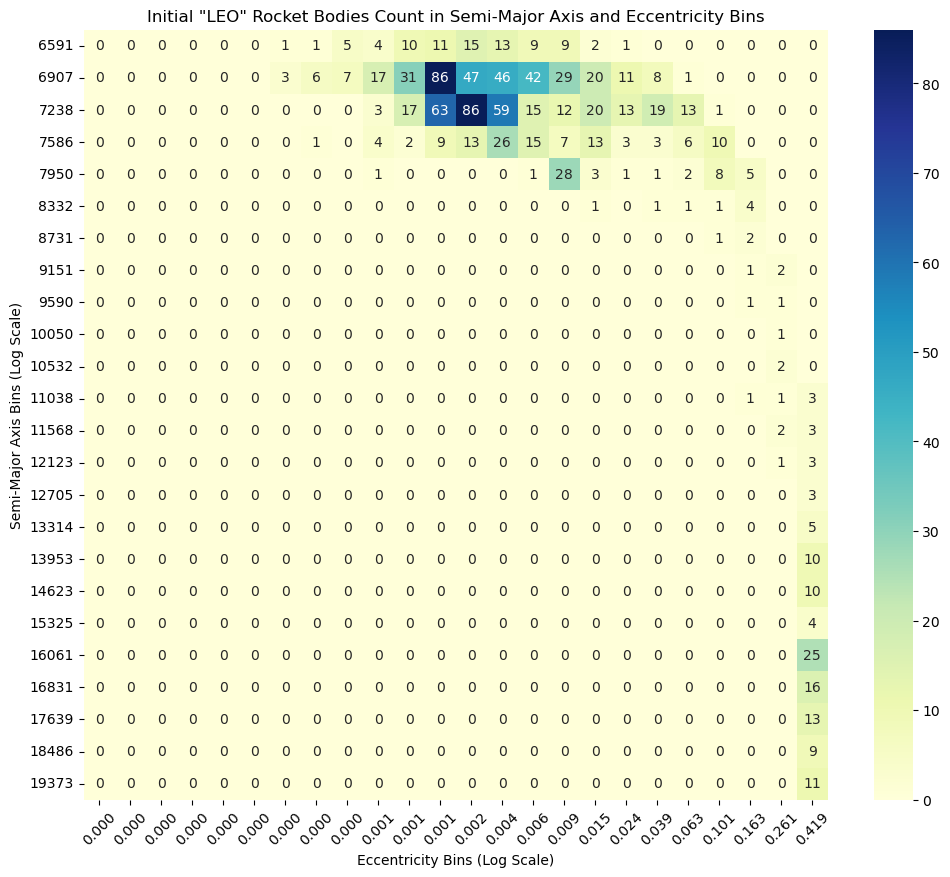

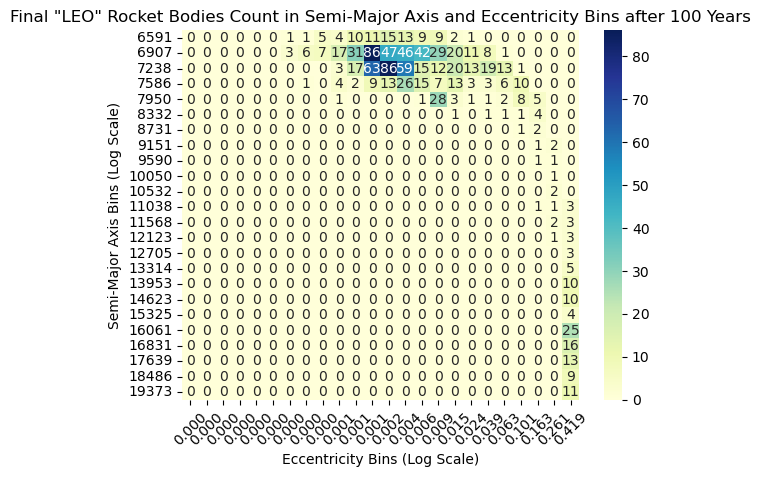

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming x0 is your DataFrame
# x0 = pd.read_csv('path_to_your_csv_file.csv')  # Uncomment this line if you need to load the DataFrame from a CSV file

# Define the non-linear bins
semi_major_axis_min = x0['sma'].min()
semi_major_axis_max = x0['sma'].max()
eccentricity_min = x0['ecc'].min()
eccentricity_max = x0['ecc'].max()

# Create non-linear spreads of bins using a logarithmic scale
semi_major_axis_bins = np.logspace(np.log10(semi_major_axis_min), np.log10(semi_major_axis_max), num=25)
eccentricity_bins = np.logspace(np.log10(eccentricity_min + 1e-10), np.log10(eccentricity_max), num=25)  # Adding a small value to avoid log(0)

n_a_bins = len(semi_major_axis_bins) - 1
n_e_bins = len(eccentricity_bins) - 1

# Filter the DataFrame for species_class 'B'
rocket_body_data = x0[x0['species_class'] == 'B']

# Bin the data
rocket_body_data['a_bin'] = rocket_body_data['sma'].apply(lambda sma: find_bin_index(semi_major_axis_bins, sma))
rocket_body_data['e_bin'] = rocket_body_data['ecc'].apply(lambda ecc: find_bin_index(eccentricity_bins, ecc))

# Initialize the matrix with zeroes
rocket_body_matrix = pd.DataFrame(0, index=range(n_a_bins), columns=range(n_e_bins))

# Populate the matrix
for idx, row in rocket_body_data.iterrows():
    a_idx = row['a_bin']
    e_idx = row['e_bin']
    if a_idx != -1 and e_idx != -1:
        rocket_body_matrix.at[a_idx, e_idx] += 1

# Propagation function
def propagate_orbits(population, param, time_step):
    new_population = np.zeros_like(population)
    for i, a in enumerate(semi_major_axis_midpoints):
        for j, e in enumerate(eccentricity_midpoints):
            if population[i, j] > 0:
                input_oe = np.array([[a, e, np.deg2rad(30), np.deg2rad(40), np.deg2rad(60), np.deg2rad(0)]])
                param['t'] = param['t_0'] + time_step
                print(param['t'])
                out_oe, errors = analytic_prop_vec_MOD(input_oe, param)
                if not errors[0]:
                    new_a = out_oe[0, 0]
                    new_e = out_oe[0, 1]
                    
                    # Calculate fractional movement
                    a_fraction = (new_a - a) / (semi_major_axis_bins[1] - semi_major_axis_bins[0])
                    e_fraction = (new_e - e) / (eccentricity_bins[1] - eccentricity_bins[0])
                    
                    a_bin = np.digitize(new_a, semi_major_axis_bins) - 1
                    e_bin = np.digitize(new_e, eccentricity_bins) - 1

                    # Ensure movement to neighboring bins
                    if 0 <= a_bin < n_a_bins and 0 <= e_bin < n_e_bins:
                        new_population[a_bin, e_bin] += population[i, j] * (1 - abs(a_fraction)) * (1 - abs(e_fraction))
                    if 0 <= a_bin + 1 < n_a_bins and 0 <= e_bin < n_e_bins:
                        new_population[a_bin + 1, e_bin] += population[i, j] * abs(a_fraction) * (1 - abs(e_fraction))
                    if 0 <= a_bin < n_a_bins and 0 <= e_bin + 1 < n_e_bins:
                        new_population[a_bin, e_bin + 1] += population[i, j] * (1 - abs(a_fraction)) * abs(e_fraction)
                    if 0 <= a_bin + 1 < n_a_bins and 0 <= e_bin + 1 < n_e_bins:
                        new_population[a_bin + 1, e_bin + 1] += population[i, j] * abs(a_fraction) * abs(e_fraction)

                    print(f"Moved {population[i, j]} objects from bin ({i}, {j}) to ({a_bin}, {e_bin})")
                    print(f"Original (a, e): ({a:.2f}, {e:.5f}), New (a, e): ({new_a:.2f}, {new_e:.5f})")
    return new_population

# Parameters
param = {
    'req': 6378.136,  # Earth's radius in km
    'j2': 1.08263e-3,  # J2 perturbation term
    'mu': 398600,  # Gravitational parameter in km^3/s^2
    'rho': 1e-12,  # Example density in kg/km^3
    'Bstar': 2e-4,  # Example Bstar value
    't_0': 0  # Initial time
}

# Time span
years = 10
days_per_year = 365.25
time_steps_per_year = 12  # Monthly time steps
total_time_steps = int(years * time_steps_per_year)
time_step = days_per_year / time_steps_per_year * 24 * 3600  # seconds

# Calculate midpoints for bins
semi_major_axis_midpoints = (semi_major_axis_bins[:-1] + semi_major_axis_bins[1:]) / 2
eccentricity_midpoints = (eccentricity_bins[:-1] + eccentricity_bins[1:]) / 2

# Initialize population matrix based on initial data distribution
population = np.zeros((n_a_bins, n_e_bins))
for idx, row in rocket_body_data.iterrows():
    a_bin = np.digitize(row['sma'], semi_major_axis_bins) - 1
    e_bin = np.digitize(row['ecc'], eccentricity_bins) - 1
    population[a_bin, e_bin] += 1

# Save initial population for comparison
initial_population = population.copy()

# Propagate orbits over time
for t in range(total_time_steps):
    population = propagate_orbits(population, param, time_step)
    print(f"Time step {t + 1}/{total_time_steps}")

# Plot the heatmap of initial population
plt.figure(figsize=(12, 10))
sns.heatmap(initial_population, annot=True, fmt="g", cmap="YlGnBu", 
            xticklabels=[f"{ecc:.3f}" for ecc in eccentricity_bins[:-1]], 
            yticklabels=[f"{sma:.0f}" for sma in semi_major_axis_bins[:-1]])
plt.xlabel('Eccentricity Bins (Log Scale)')
plt.ylabel('Semi-Major Axis Bins (Log Scale)')
plt.title('Initial "LEO" Rocket Bodies Count in Semi-Major Axis and Eccentricity Bins')
plt.xticks(rotation=45)
plt.show()
sns.heatmap(initial_population, annot=True, fmt=".0f", cmap="YlGnBu", 
            xticklabels=[f"{ecc:.3f}" for ecc in eccentricity_bins[:-1]], 
            yticklabels=[f"{sma:.0f}" for sma in semi_major_axis_bins[:-1]])
plt.xlabel('Eccentricity Bins (Log Scale)')
plt.ylabel('Semi-Major Axis Bins (Log Scale)')
plt.title('Final "LEO" Rocket Bodies Count in Semi-Major Axis and Eccentricity Bins after 100 Years')
plt.xticks(rotation=45)
plt.show()

In [16]:
x0.columns

Index(['Unnamed: 0', 'adept_id', 'epoch_start', 'sma', 'ecc', 'inc', 'raan',
       'aop', 'ma', 'epoch_end', 'obj_type', 'disp_option', 'stationkeeping',
       'area', 'mass', 'size', 'weight', 'epoch_start_datime', 'obj_class',
       'apogee', 'perigee', 'alt', 'species_class', 'species', 'alt_bin'],
      dtype='object')

In [116]:
def densityexp(h):
    """
    Uses table from pp. 537 (Table 8-4) in Vallado for simple exponential
    atmospheric density model.

    Exponential model, U. S. Standard Atmosphere (1976) and CIRA-72

    Args:
        h (list with one float item): The height above ellipsoid in km.

    Returns:
        float: Density in kg/km^3.
    """

    try:
        h = h[0]
    except TypeError:
        print(h)

    if 0 <= h < 25:
        h0, p0, H = 0, 1.225, 7.249
    elif 25 <= h < 30:
        h0, p0, H = 25, 3.899e-2, 6.349
    elif 30 <= h < 40:
        h0, p0, H = 30, 1.774e-2, 6.682
    elif 40 <= h < 50:
        h0, p0, H = 40, 3.972e-3, 7.554
    elif 50 <= h < 60:
        h0, p0, H = 50, 1.057e-3, 8.382
    elif 60 <= h < 70:
        h0, p0, H = 60, 3.206e-4, 7.714
    elif 70 <= h < 80:
        h0, p0, H = 70, 8.770e-5, 6.549
    elif 80 <= h < 90:
        h0, p0, H = 80, 1.905e-5, 5.799
    elif 90 <= h < 100:
        h0, p0, H = 90, 3.396e-6, 5.382
    elif 100 <= h < 110:
        h0, p0, H = 100, 5.297e-7, 5.877
    elif 110 <= h < 120:
        h0, p0, H = 110, 9.661e-8, 7.263
    elif 120 <= h < 130:
        h0, p0, H = 120, 2.438e-8, 9.473
    elif 130 <= h < 140:
        h0, p0, H = 130, 8.484e-9, 12.636
    elif 140 <= h < 150:
        h0, p0, H = 140, 3.845e-9, 16.149
    elif 150 <= h < 180:
        h0, p0, H = 150, 2.070e-9, 22.523
    elif 180 <= h < 200:
        h0, p0, H = 180, 5.464e-10, 29.740
    elif 200 <= h < 250:
        h0, p0, H = 200, 2.789e-10, 37.105
    elif 250 <= h < 300:
        h0, p0, H = 250, 7.248e-11, 45.546
    elif 300 <= h < 350:
        h0, p0, H = 300, 2.418e-11, 53.628
    elif 350 <= h < 400:
        h0, p0, H = 350, 9.518e-12, 53.298
    elif 400 <= h < 450:
        h0, p0, H = 400, 3.725e-12, 58.515
    elif 450 <= h < 500:
        h0, p0, H = 450, 1.585e-12, 60.828
    elif 500 <= h < 600:
        h0, p0, H = 500, 6.967e-13, 63.822
    elif 600 <= h < 700:
        h0, p0, H = 600, 1.454e-13, 71.835
    elif 700 <= h < 800:
        h0, p0, H = 700, 3.614e-14, 88.667
    elif 800 <= h < 900:
        h0, p0, H = 800, 1.170e-14, 124.64
    elif 900 <= h < 1000:
        h0, p0, H = 900, 5.245e-15, 181.05
    elif h >= 1000:
        h0, p0, H = 1000, 3.019e-15, 268.00
    else:
        raise ValueError(f'Invalid height: {h}')

    p = p0 * np.exp((h0 - h) / H)
    
    # Convert density to kg/km^3
    return p * 1000**3

In [133]:
def mean2osc_vec(oemean, param):
    """
    Convert mean classical orbital elements to osculating classical orbital elements.

    Args:
        oemean (np.ndarray): Mean classical orbital elements [a, e, i, RA, w, true anomaly].
        param (dict): Dictionary of parameters including 'mu', 'req', and 'j2'.

    Returns:
        np.ndarray: Osculating classical orbital elements.
    """
    pi2 = 2.0 * np.pi

    # Compute j2 effect on orbital elements
    doe = delm(oemean, param)

    oeosc = oemean + doe
    oeosc[:, 2:6] = np.mod(oeosc[:, 2:6] + pi2, pi2)
    
    return oeosc

def anomly(nflg, ain, e):
    """
    Orbital anomaly function.

    Args:
        nflg (int): Type of anomaly to compute.
        ain (np.ndarray): Input anomaly.
        e (np.ndarray): Orbital eccentricity.

    Returns:
        np.ndarray: Computed anomaly.
    """
    if nflg in [1, 2]:
        am = ain
    elif nflg in [3, 4]:
        ea = ain
    elif nflg in [5, 6]:
        f = ain

    if nflg in [1, 2]:
        ea = kepler1_vec(am, e)
    if nflg in [2, 4]:
        f = 2.0 * np.arctan(np.sqrt((1.0 + e) / (1.0 - e)) * np.tan(ea / 2.0))
    if nflg in [5, 6]:
        ea = 2.0 * np.arctan(np.sqrt((1.0 - e) / (1.0 + e)) * np.tan(f / 2.0))
    if nflg in [5, 3]:
        am = ea - e * np.sin(ea)

    if nflg in [1, 6]:
        aout = ea
    elif nflg in [2, 4]:
        aout = f
    elif nflg in [3, 5]:
        aout = am

    return aout

def delm(x, param):
    """
    Compute j2 effect on orbital elements.

    Args:
        x (np.ndarray): Mean orbital elements [a, e, i, RA, w, M].
        param (dict): Dictionary of parameters including 'mu', 'req', and 'j2'.

    Returns:
        np.ndarray: Corrections to the orbital elements.
    """
    mu = param['mu']
    req = param['req']
    j2 = param['j2']

    pi2 = 2.0 * np.pi

    a = x[:, 0]
    e = x[:, 1]
    ai = x[:, 2]
    an = x[:, 3]
    w = x[:, 4]
    am = x[:, 5]

    f = anomly(2, am, e)
    f = np.mod(f + pi2, pi2)
    am = np.mod(am + pi2, pi2)

    si = np.sin(ai)
    ci = np.cos(ai)
    ti = si / ci

    si2 = si * si
    ci2 = ci * ci

    sf = np.sin(f)
    cf = np.cos(f)
    s2f = np.sin(2.0 * f)

    u = f + w

    e2 = e * e
    esf = e * sf

    d1 = 1.0 - e2
    d2 = np.sqrt(d1)
    d3 = e * cf
    d4 = 1.0 + d3
    d42 = d4 * d4
    d5 = 1.0 + d2
    d6 = (3.0 * ci2 - 1.0) / d5

    p = a * d1
    d7 = np.sqrt(mu / p)
    r = p / d4
    rdot = d7 * esf

    twou = 2.0 * u
    twow = 2.0 * w

    s2u = np.sin(twou)
    c2u = np.cos(twou)
    sf2w = np.sin(f + twow)
    d8 = 3.0 * f + twow
    s3f2w = np.sin(d8)
    cf2w = np.cos(f + twow)
    c3f2w = np.cos(d8)

    q1 = j2 * (req / p) ** 2

    di = 0.75 * q1 * si * ci * (c2u + e * cf2w + e / 3.0 * c3f2w)
    dp = 2.0 * p * ti * di

    dummy1 = f - am + esf - 0.5 * s2u - 0.5 * e * sf2w - e * s3f2w / 6.0
    dn = -1.5 * q1 * ci * dummy1

    dr = -0.25 * p * q1 * ((3.0 * ci2 - 1.0) * (2.0 * d2 / d4 + d3 / d5 + 1.0) - si2 * c2u)
    drdot = 0.25 * d7 * q1 * (d6 * esf * (d2 * d5 + d42) - 2.0 * si2 * d42 * s2u)

    du = -0.125 * q1 * (6.0 * (1.0 - 5.0 * ci2) * (f - am) + 4.0 * esf * ((1.0 - 6.0 * ci2) - d6) - d6 * e2 * s2f + 2.0 * (5.0 * ci2 - 2.0) * e * sf2w + (7.0 * ci2 - 1.0) * s2u + 2.0 * ci2 * e * s3f2w)

    pnw = p + dp
    ainw = ai + di
    annw = an + dn
    rnw = r + dr
    rdotnw = rdot + drdot
    unw = u + du

    aa = pnw / rnw - 1.0
    bb = np.sqrt(pnw / mu) * rdotnw

    enw2 = aa * aa + bb * bb
    enw = np.sqrt(enw2)

    xfnw = np.arctan2(bb, aa)

    anw = pnw / (1.0 - enw2)
    wnw = unw - xfnw

    amnw = anomly(5, xfnw, enw)

    dx = np.zeros((len(a), 6))
    dx[:, 0] = anw - a
    dx[:, 1] = enw - e
    dx[:, 2] = ainw - ai
    dx[:, 3] = annw - an
    dx[:, 4] = wnw - w
    dx[:, 5] = amnw - am

    return dx

def kepler1_vec(M, e, tol=1e-10, max_iter=1000):
    """
    Solve Kepler's equation for the eccentric anomaly using the Newton-Raphson method.

    Args:
        M (np.ndarray): Mean anomaly.
        e (np.ndarray): Orbital eccentricity.
        tol (float): Tolerance for convergence.
        max_iter (int): Maximum number of iterations.

    Returns:
        np.ndarray: Eccentric anomaly.
    """
    E = M.copy()
    for _ in range(max_iter):
        delta = (E - e * np.sin(E) - M) / (1 - e * np.cos(E))
        E -= delta
        if np.all(np.abs(delta) < tol):
            break
    return E

In [165]:
import numpy as np
def analytic_prop_vec_MOD(input_oe, param):
    """
    Compute the osculating orbital elements based on input mean orbital elements and parameters.

    Args:
        input_oe (np.ndarray): Input mean orbital elements [a, e, i, RA, w, Mo].
        param (dict): Dictionary of parameters including 'req', 'j2', 'mu', 'Bstar', 'rho', 't', and 't_0'.

    Returns:
        np.ndarray: Osculating orbital elements.
        np.ndarray: Error indicators (1 if error, 0 if no error).
    """
    print(input_oe)
    re = param['req']
    J2 = param['j2']
    mu = param['mu']
    rho_0 = param['rho']
    Bstar = param['Bstar']
    t = param['t']
    t_0 = param['t_0']
    
    a_0 = input_oe[0]
    e_0 = input_oe[1]
    inc_0 = input_oe[2]
    bigO_0 = input_oe[3]
    omega_0 = input_oe[4]
    Mo_0 = input_oe[5]

    c = np.cos(inc_0)
    c_sq = c ** 2

    n_0 = np.sqrt(mu) * a_0 ** (-3/2)
    alpha0_sq = (e_0 / np.sqrt(a_0)) ** 2
    beta_0 = (np.sqrt(3) / 2) * e_0

    tan_atan_beta0 = np.maximum(np.tan(np.arctan(beta_0) - beta_0 * n_0 * a_0 * Bstar * rho_0 * (t - t_0)), 0)
    a = (a_0 / beta_0 ** 2) * tan_atan_beta0 ** 2
    e = (2 / np.sqrt(3)) * tan_atan_beta0

    # Handle cases where beta_0 is zero
    if beta_0 == 0:
        C_0_beta = Bstar * rho_0  # Treat rho_0 as scalar
        a = a_0 * (1 - C_0_beta * n_0 * a_0 * (t - t_0))

    # Compute variables to avoid repetition
    a_sq = a ** 2
    four_thirds_over_a_cb = 4 / 3 / (a_sq * a)
    a0_sq = a_0 ** 2
    four_thirds_over_a0_cb = 4 / 3 / (a0_sq * a_0)
    alpha0sq_over_asq = alpha0_sq / a_sq
    alpha0sq_over_a0sq = alpha0_sq / a0_sq

    k2_over_mu = J2 * re ** 2 / 2
    C_0 = np.maximum(0.5 * Bstar * rho_0, 1e-20)

    Mo = (0.5 / a - 0.5 / a_0 + 3 / 8 * alpha0_sq * np.log(a / a_0)) / C_0 + \
         3 * k2_over_mu / 16 * (3 * c_sq - 1) * \
         (1.5 * (alpha0sq_over_asq - alpha0sq_over_a0sq) + four_thirds_over_a_cb - four_thirds_over_a0_cb) / C_0 + Mo_0

    five_a0sq_over2_tau2_plus_4thirds_over_tau3_over_C0 = \
        (2.5 * (alpha0sq_over_asq - alpha0sq_over_a0sq) + four_thirds_over_a_cb - four_thirds_over_a0_cb) / C_0

    omega = 3 * k2_over_mu / 16 * (5 * c_sq - 1) * five_a0sq_over2_tau2_plus_4thirds_over_tau3_over_C0 + omega_0
    bigO = -3 * k2_over_mu / 8 * c * five_a0sq_over2_tau2_plus_4thirds_over_tau3_over_C0 + bigO_0

    out_oe = np.array([a, e, np.mod(inc_0, 2 * np.pi), np.mod(bigO, 2 * np.pi), np.mod(omega, 2 * np.pi), np.mod(Mo, 2 * np.pi)])
    
    errors = np.zeros_like(out_oe)
    not_real = ~np.isreal(out_oe)
    errors[not_real] = 1
    out_oe[not_real] = input_oe[not_real]
    
    return out_oe, errors

import numpy as np

def mean2osc_m_vec(x, param):
    """
    Convert mean orbital elements to osculating orbital elements.

    Args:
        x (np.ndarray): Input mean orbital elements [a, e, i, RA, w, Mo].
        param (dict): Dictionary of parameters.

    Returns:
        np.ndarray: Osculating orbital elements.
        np.ndarray: True anomalies.
        np.ndarray: Eccentric anomalies.
    """
    if x.ndim == 1:
        x = x[np.newaxis, :]  # Convert 1D array to 2D array with one row

    # Unpack the mean orbital elements
    a = x[:, 0]
    e = x[:, 1]
    i = x[:, 2]
    RA = x[:, 3]
    w = x[:, 4]
    Mo = x[:, 5]

    # Solve Kepler's equation for eccentric anomaly
    Epw = Mo.copy()
    for _ in range(1000):
        Epw_check = Epw
        DeltaEpw = -(Mo - Epw_check + e * np.sin(Epw_check)) / (-1 + e * np.cos(Epw_check))
        Epw += DeltaEpw
        if np.all(np.abs(DeltaEpw) < 1e-14):
            break

    # Calculate the true anomaly
    sqrt_ep1_em1 = np.sqrt((1 + e) / (1 - e))
    theta = 2 * np.arctan(sqrt_ep1_em1 * np.tan(Epw / 2))

    # Convert mean orbital elements to osculating elements
    oeosc = mean2osc_vec(np.column_stack([a, e, i, RA, w, theta]), param)
    theta_osc = oeosc[:, 5]
    e_osc = oeosc[:, 1]

    # Compute the osculating mean anomaly
    E_osc = 2 * np.arctan(np.tan(theta_osc / 2) / sqrt_ep1_em1)
    M_osc = E_osc - e_osc * np.sin(E_osc)

    # Combine osculating elements
    osc_orbital_elements = np.column_stack([oeosc[:, :5], M_osc])

    return osc_orbital_elements, theta_osc, E_osc

def mean2osc_vec(oemean, param):
    """
    Convert mean classical orbital elements to osculating classical orbital elements.

    Args:
        oemean (np.ndarray): Mean classical orbital elements [a, e, i, RA, w, true anomaly].
        param (dict): Dictionary of parameters including 'mu', 'req', and 'j2'.

    Returns:
        np.ndarray: Osculating classical orbital elements.
    """
    pi2 = 2.0 * np.pi

    # Compute j2 effect on orbital elements
    doe = delm(oemean, param)

    oeosc = oemean + doe
    oeosc[:, 2:6] = np.mod(oeosc[:, 2:6] + pi2, pi2)
    
    return oeosc

In [169]:
import numpy as np
import matplotlib.pyplot as plt

# Spacecraft size/mass
A = 1 * 1e-6  # m^2 or * 1e-6 km^2
m = 300  # kg
cd = 2.2  # drag coefficient
B = cd * A / m

# Constants
mu = 398600  # Gravitational parameter (km^3/s^2)
RE = 6378  # Earth's radius (km)
J2 = 1082.63e-6  # Earth's J2
hours = 3600  # Hours to seconds
days = 24 * hours  # Days to seconds
months = 30 * days
years = 12 * months
deg = np.pi / 180  # Degrees to radians

# Initial conditions
rp0 = RE + 1000  # perigee radius (km)
ra0 = RE + 1000 # apogee radius (km)
nout = 7 * days
tf = 200 * 12 * 30 * days

e0 = (ra0 - rp0) / (ra0 + rp0)  # eccentricity
h0 = np.sqrt(rp0 * mu * (1 + e0))  # angular momentum (km^2/s)
a0 = (rp0 + ra0) / 2  # Semi-major axis (km)
T0 = 2 * np.pi / np.sqrt(mu) * a0 ** 1.5  # Period (s)
coe0 = [h0, e0, 0, 0, 0, 0]  # Initial orbital elements
t0 = 0  # True anomaly at t0

# Angular momentum (h)
h = np.sqrt(a0 * (1 - e0) * mu * (1 + e0))

# Radius (r)
r = h ** 2 / mu / (1 + e0 * np.cos(t0))

alt = int(r) - RE
rho = densityexp(alt) # density in kg/km^3

param = {
    'req': RE,  # Earth's radius in km
    'j2': 0,  # J2 perturbation term set to 0 - why is this?
    'mu': mu,  # Gravitational parameter in km^3/s^2
    'Bstar': 7.333333333333334e-09, # B,
    'rho': rho,  # Example density in kg/km^3
    't_0': 0  # Initial time
}

print(param)

# Time span
time_steps = int(tf / nout)
time_step = nout

# Function to propagate and record the evolution of orbital elements
def propagate_orbit(initial_oe, time_steps, time_step, param):
    sma_over_time = [initial_oe[0, 0]]
    ecc_over_time = [initial_oe[0, 1]]
    perigee_over_time = [initial_oe[0, 0] * (1 - initial_oe[0, 1])]
    apogee_over_time = [initial_oe[0, 0] * (1 + initial_oe[0, 1]) - RE]
    input_oe = initial_oe.copy()
    
    for t in range(time_steps):
        param['t'] = param['t_0'] + (t + 1) * time_step
        out_oe, errors = analytic_prop_vec_MOD(input_oe, param)
        
        # Check if the perigee height is above 200 km
        if (out_oe[0, 0] * (1 - out_oe[0, 1])) >= (RE + 200):
            sma_over_time.append(out_oe[0, 0])
            ecc_over_time.append(out_oe[0, 1])
            perigee_over_time.append(out_oe[0, 0] * (1 - out_oe[0, 1]))
            input_oe = out_oe  # Update the initial orbital elements for the next step
            
            # Recalculate the atmospheric density
            altitude = (out_oe[0, 0] * (1 - out_oe[0, 1])) - RE
            rho = densityexp([altitude])
            param['rho'] = rho
        else:
            sma_over_time.append(sma_over_time[-1])
            ecc_over_time.append(ecc_over_time[-1])
            perigee_over_time.append(perigee_over_time[-1])
            apogee_over_time.append(apogee_over_time[-1])
    
    return sma_over_time, ecc_over_time, perigee_over_time, apogee_over_time


# Initial orbital elements
initial_oe = np.array([[a0, e0, np.deg2rad(30), np.deg2rad(40), np.deg2rad(60), np.deg2rad(0)]])

# Propagate the orbit
sma_over_time, ecc_over_time, perigee_over_time, altitude_over_time = propagate_orbit(initial_oe, time_steps, time_step, param)

# Convert time to years for plotting
time_years = np.linspace(0, tf / years, time_steps + 1)

# Plot the results
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.plot(time_years, sma_over_time, label='Semi-Major Axis (sma)')
plt.xlabel('Time (years)')
plt.ylabel('Semi-Major Axis (km)')
plt.title('Semi-Major Axis over 100 Years')
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(time_years, ecc_over_time, label='Eccentricity (ecc)', color='orange')
plt.xlabel('Time (years)')
plt.ylabel('Eccentricity')
plt.title('Eccentricity over 100 Years')
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(time_years, perigee_over_time, label='Perigee')
plt.xlabel('Time (years)')
plt.ylabel('Perigee (km)')
plt.title('Perigee over 100 Years')
plt.grid(True)
plt.legend()

# plt.subplot(2, 2, 4)
# plt.plot(time_years, altitude_over_time, label='Altitude')
# plt.xlabel('Time (years)')
# plt.ylabel('Altitude (km)')
# plt.title('Altitude over 100 Years')
# plt.grid(True)
# plt.legend()

plt.tight_layout()
plt.show()

TypeError: 'int' object is not subscriptable

In [171]:
import numpy as np
import time

# Constants and initial conditions
mu = 398600  # Gravitational parameter (km^3/s^2)
RE = 6378  # Earth's radius (km)
J2 = 1082.63e-6  # Earth's J2
hours = 3600  # Hours to seconds
days = 24 * hours  # Days to seconds
months = 30 * days
years = 12 * months

A = 1 * 1e-6  # m^2 or * 1e-6 km^2
m = 300  # kg
cd = 2.2  # drag coefficient
B = cd * A / m

# Initial conditions
rp0 = RE + 750  # perigee radius (km)
ra0 = RE + 1400  # apogee radius (km)
t0 = 0  # Initial time
nout = 7 * days
tf = 12 * 30 * days
tf1 = tf

e0 = (ra0 - rp0) / (ra0 + rp0)  # eccentricity
a0 = (rp0 + ra0) / 2  # Semi-major axis (km)
i0 = 30 * np.pi / 180  # inclination
RA0 = 40 * np.pi / 180  # right ascension of ascending node
w0 = 60 * np.pi / 180  # argument of perigee
TA0 = 0  # true anomaly

input_oe = np.array([a0, e0, i0, RA0, w0, TA0])

# Compute h and r
h = np.sqrt(input_oe[0] * (1 - input_oe[1]) * mu * (1 + input_oe[1]))
r = h**2 / mu / (1 + input_oe[1] * np.cos(input_oe[5]))

# Compute mean orbital elements
mean_orbital_elements, _, _ = osc2mean_m_vec(input_oe, {'mu': mu, 'req': RE, 'j2': J2*0}, TA0)
input_oe = mean_orbital_elements

rho = densityexp([r - RE])

param['Bstar'] = B
param['rho'] = rho

# Time array
t2 = np.arange(t0, tf1 + nout, nout)

# Initialize output arrays
out_oe = np.zeros((len(t2) - 1, 6))
errors = np.zeros((len(t2) - 1, 1))

print("\nAnalytical propagator cpu time:")
start_time = time.time()

for i1 in range(len(t2) - 1):
    if input_oe[0] * (1 - input_oe[1]) < RE + 200:
        out_oe[i1, :] = out_oe[i1 - 1, :]
    else:
        param['t_0'] = t2[i1]
        param['t'] = t2[i1 + 1]
        param['rho'] = rho  # [kg/km^3]
        out_oe_temp, errors_temp = analytic_prop_vec_MOD(input_oe, param)
        out_oe[i1, :], errors[i1, 0] = out_oe_temp, errors_temp[0]

        osc_orbital_elements, theta_osc, _ = mean2osc_m_vec(out_oe[i1, :], param)

        print(osc_orbital_elements.shape)
        a_osc = osc_orbital_elements[0][0]
        e_osc = osc_orbital_elements[0][1]

        h = np.sqrt(a_osc * (1 - e_osc) * mu * (1 + e_osc))
        r = h**2 / mu / (1 + e_osc * np.cos(theta_osc))

        rho = densityexp([r - RE])
        input_oe = out_oe[i1, :]

end_time = time.time()
print(f"CPU time: {end_time - start_time} seconds")

t2 = t2[:-1]
osc_orbital_elements, theta_osc, _ = mean2osc_m_vec(out_oe, param)
y2 = osc_orbital_elements

# Assign the time histories mnemonic variable names
a2 = y2[:, 0]
e2 = y2[:, 1]

print("Semi-major axis over time:", a2)
print("Eccentricity over time:", e2)


Analytical propagator cpu time:
[7.45300000e+03 4.36066014e-02 5.23598776e-01 6.98131701e-01
 1.04719755e+00 0.00000000e+00]
(1, 6)
[7.45299004e+03 4.36065722e-02 5.23598776e-01 6.98131701e-01
 1.04719755e+00 5.65888168e+00]


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (6,) + inhomogeneous part.

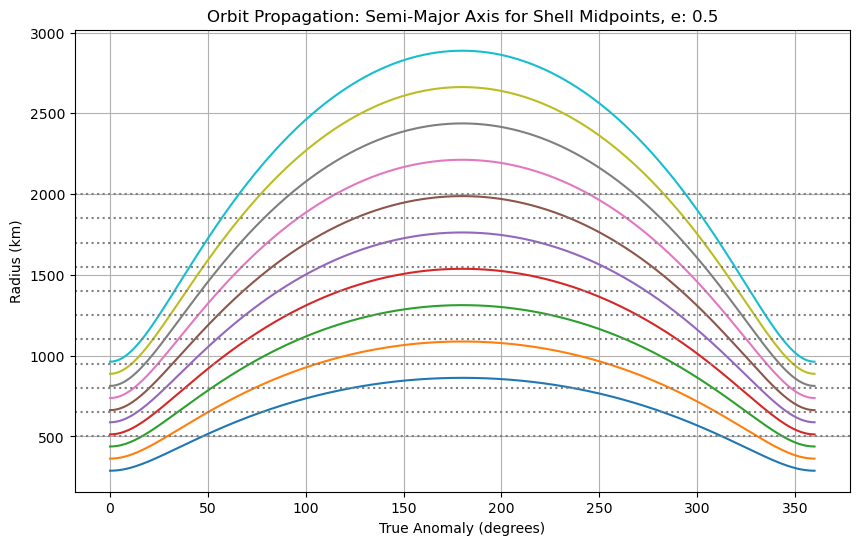

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.time import Time
from poliastro.bodies import Earth
from poliastro.twobody import Orbit

def propagate_orbit(a, e, mu, num_points=1000):
    """
    Propagate an orbit using the poliastro library and calculate positions over one orbit.

    Args:
        a (float): Semi-major axis in km.
        e (float): Eccentricity.
        mu (float): Gravitational parameter in km^3/s^2.
        num_points (int): Number of points to calculate in the orbit.

    Returns:
        tuple: Arrays of the true anomaly and radius over the orbit.
    """
    # Define the orbit using poliastro's Orbit class
    orbit = Orbit.from_classical(Earth, a * u.km, e * u.one, 0 * u.deg, 0 * u.deg, 0 * u.deg, 0 * u.deg)

    # Time array over one period
    period = orbit.period.to(u.s).value
    time_values = np.linspace(0, period, num_points) * u.s

    # Propagate the orbit over time_values
    positions = np.array([orbit.propagate(t).r for t in time_values])
    radii = np.linalg.norm(positions, axis=1)

    # Calculate true anomaly for each point (using argument of latitude)
    true_anomalies = np.linspace(0, 2 * np.pi, num_points)

    return true_anomalies, radii

def plot_orbit(R0_km_midpoints, R0_km, mu, e, num_points=1000):
    """
    Plot the semi-major axis, perigee, and apogee for each midpoint of the shells in R0_km.

    Args:
        R0_km_midpoints (np.ndarray): Array of midpoints of shell boundaries in km.
        R0_km (np.ndarray): Array of shell boundary altitudes in km.
        mu (float): Gravitational parameter in km^3/s^2.
        e (float): Eccentricity.
        num_points (int): Number of points to calculate in the orbit.
    """
    plt.figure(figsize=(10, 6))

    for a in R0_km_midpoints:
        # Propagate the orbit for each semi-major axis at the midpoint of the shells
        true_anomalies, radii = propagate_orbit(a, e, mu, num_points)

        # Plot the orbital radius over time
        plt.plot(np.degrees(true_anomalies), radii, label=f'Semi-major axis = {a:.2f} km')

    # Plot the shell boundaries
    for r0 in R0_km:
        plt.axhline(y=r0, color='gray', linestyle=':', label=f'Shell Boundary = {r0:.2f} km')

    plt.xlabel('True Anomaly (degrees)')
    plt.ylabel('Radius (km)')
    plt.title(f'Orbit Propagation: Semi-Major Axis for Shell Midpoints, e: {e}')
   
    #plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    # Input parameters
    e = 0.5  # eccentricity
    R0_km = np.array([500., 650., 800., 950., 1100., 1250., 1400., 1550., 1700., 1850., 2000.])  # shell boundaries in km
    mu = 398600.4418  # standard gravitational parameter in km^3/s^2 (for Earth)

    # Calculate the midpoints of each shell
    R0_km_midpoints = (R0_km[:-1] + R0_km[1:]) / 2

    # Plot the results for each midpoint
    plot_orbit(R0_km_midpoints, R0_km, mu, e)

Time in shell for a = 575.00 km, e = 0.01: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Time in shell for a = 725.00 km, e = 0.01: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Time in shell for a = 875.00 km, e = 0.01: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Time in shell for a = 1025.00 km, e = 0.01: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Time in shell for a = 1175.00 km, e = 0.01: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Time in shell for a = 1325.00 km, e = 0.01: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Time in shell for a = 1475.00 km, e = 0.01: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Time in shell for a = 1625.00 km, e = 0.01: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Time in shell for a = 1775.00 km, e = 0.01: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Time in shell for a = 1925.00 km, e = 0.01: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Time in shell for a = 575.00 km, e = 0.05: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Time in shell for a = 725.00 km, e = 0.05: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Time in shell for a = 875.00 km, e = 0.05: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Time in shell for 

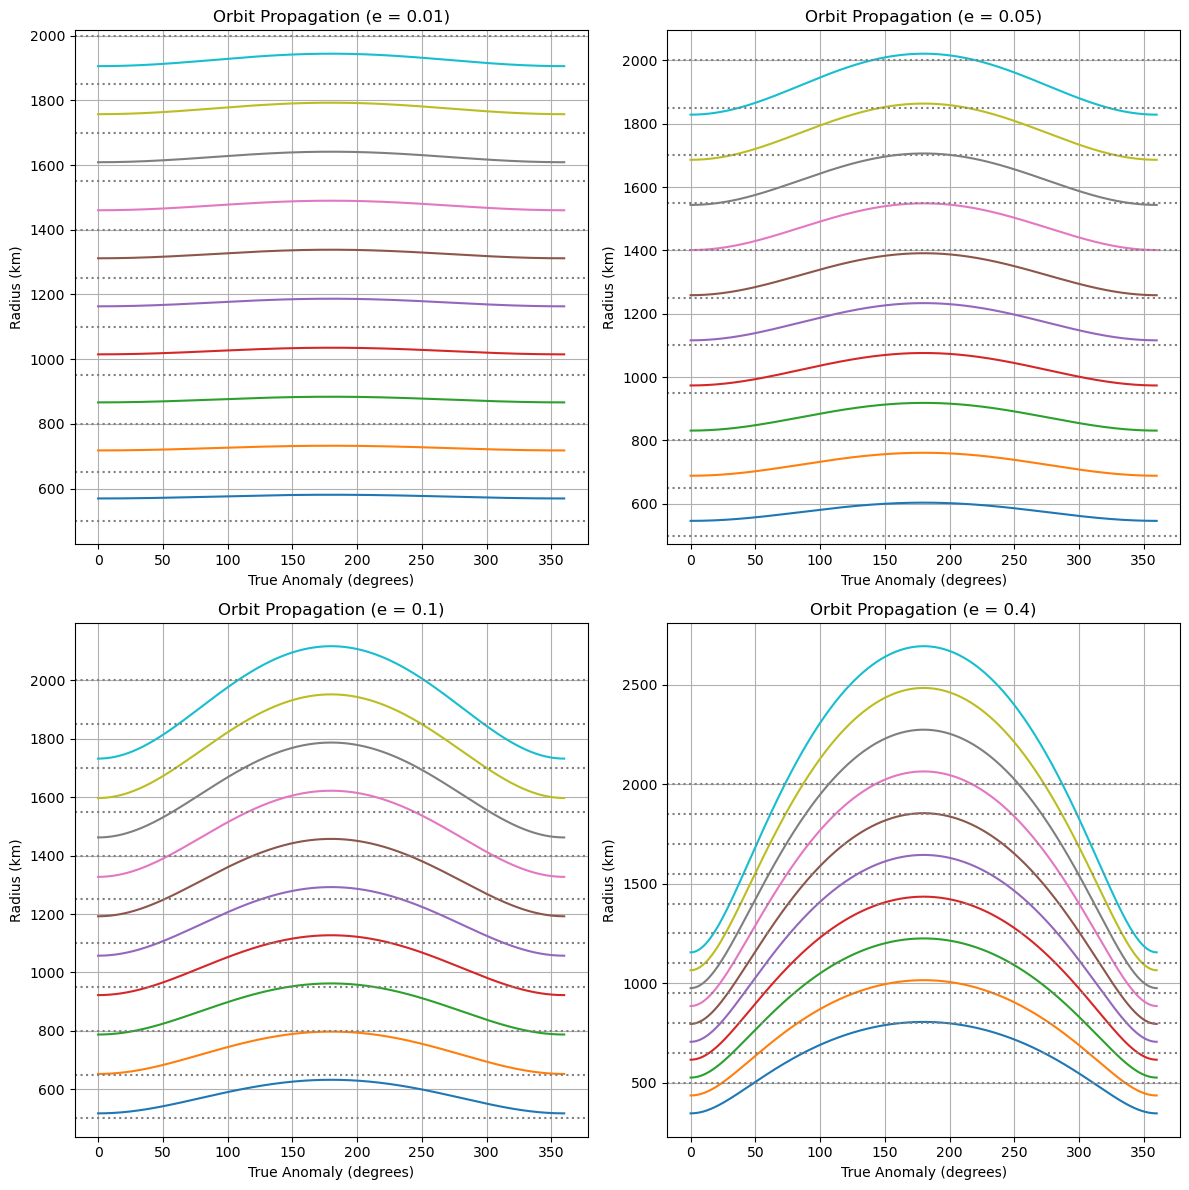

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from poliastro.bodies import Earth
from poliastro.twobody import Orbit

def propagate_orbit(a, e, mu, num_points=1000):
    """
    Propagate an orbit using the poliastro library and calculate positions over one orbit.

    Args:
        a (float): Semi-major axis in km.
        e (float): Eccentricity.
        mu (float): Gravitational parameter in km^3/s^2.
        num_points (int): Number of points to calculate in the orbit.

    Returns:
        tuple: Arrays of the true anomaly and radius over the orbit.
    """
    # Define the orbit using poliastro's Orbit class
    orbit = Orbit.from_classical(Earth, a * u.km, e * u.one, 0 * u.deg, 0 * u.deg, 0 * u.deg, 0 * u.deg)

    # Time array over one period
    period = orbit.period.to(u.s).value
    time_values = np.linspace(0, period, num_points) * u.s

    # Propagate the orbit over time_values
    positions = np.array([orbit.propagate(t).r for t in time_values])
    radii = np.linalg.norm(positions, axis=1)

    # Calculate true anomaly for each point (using argument of latitude)
    true_anomalies = np.linspace(0, 2 * np.pi, num_points)

    return true_anomalies, radii

def calculate_time_in_shell(radii, R0_km):
    """
    Calculate the normalized time spent in each shell.

    Args:
        radii (np.ndarray): Array of orbital radii.
        R0_km (np.ndarray): Array of shell boundary altitudes in km.

    Returns:
        np.ndarray: Normalized time spent in each shell.
    """
    time_in_shell = np.zeros(len(R0_km) - 1)

    for i in range(len(R0_km) - 1):
        # Check if the radius falls within the shell boundaries
        in_shell = (radii >= R0_km[i]) & (radii < R0_km[i + 1])
        time_in_shell[i] = np.sum(in_shell)

    # Normalize the time_in_shell array
    total_time = np.sum(time_in_shell)
    if total_time > 0:
        time_in_shell /= total_time

    return time_in_shell

def plot_orbit(ax, R0_km_midpoints, R0_km, mu, e, num_points=1000):
    """
    Plot the semi-major axis, perigee, and apogee for each midpoint of the shells in R0_km.

    Args:
        ax (matplotlib.axes.Axes): The subplot axes to plot on.
        R0_km_midpoints (np.ndarray): Array of midpoints of shell boundaries in km.
        R0_km (np.ndarray): Array of shell boundary altitudes in km.
        mu (float): Gravitational parameter in km^3/s^2.
        e (float): Eccentricity.
        num_points (int): Number of points to calculate in the orbit.
    """
    for a in R0_km_midpoints:
        # Propagate the orbit for each semi-major axis at the midpoint of the shells
        true_anomalies, radii = propagate_orbit(a, e, mu, num_points)

        # Calculate the time in each shell
        time_in_shell = calculate_time_in_shell(radii, R0_km)
        print(f"Time in shell for a = {a:.2f} km, e = {e}: {time_in_shell}")

        # Plot the orbital radius over time
        ax.plot(np.degrees(true_anomalies), radii, label=f'Semi-major axis = {a:.2f} km')

    # Plot the shell boundaries
    for r0 in R0_km:
        ax.axhline(y=r0, color='gray', linestyle=':', label=f'Shell Boundary = {r0:.2f} km')

    ax.set_xlabel('True Anomaly (degrees)')
    ax.set_ylabel('Radius (km)')
    ax.set_title(f'Orbit Propagation (e = {e})')
    ax.grid(True)

def plot_2x2_orbits(R0_km_midpoints, R0_km, mu):
    """
    Create a 2x2 plot of orbits with different eccentricities.

    Args:
        R0_km_midpoints (np.ndarray): Array of midpoints of shell boundaries in km.
        R0_km (np.ndarray): Array of shell boundary altitudes in km.
        mu (float): Gravitational parameter in km^3/s^2.
    """
    eccentricities = [0.01, 0.05, 0.1, 0.4]

    fig, axs = plt.subplots(2, 2, figsize=(12, 12))

    for ax, e in zip(axs.flat, eccentricities):
        plot_orbit(ax, R0_km_midpoints, R0_km, mu, e)

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Input parameters
    R0_km = np.array([500., 650., 800., 950., 1100., 1250., 1400., 1550., 1700., 1850., 2000.])  # shell boundaries in km
    mu = 398600.4418  # standard gravitational parameter in km^3/s^2 (for Earth)

    # Calculate the midpoints of each shell
    R0_km_midpoints = (R0_km[:-1] + R0_km[1:]) / 2

    # Plot the 2x2 orbits with different eccentricities
    plot_2x2_orbits(R0_km_midpoints, R0_km, mu)

In [35]:
import pickle 

# open scenario-properties-baseline.pkl
with open('scenario-properties-baseline.pkl', 'rb') as f:
    data = pickle.load(f)

In [44]:
data.full_coll[1]

3.15631964572144e-5*pi*B_e0.01_1**2 + 3.08262076950065e-5*pi*B_e0.01_1*B_e0.02_1 + 3.13477313041436e-5*pi*B_e0.01_1*B_e0.05_1 + 3.11591992952067e-5*pi*B_e0.01_1*B_e0.1_1 + 3.09486310774331e-5*pi*B_e0.01_1*B_e0.4_1 + 5.55011940665434e-9*pi*B_e0.01_1*N_0.00141372kg_1 + 3.9145511129063e-7*pi*B_e0.01_1*N_0.567kg_1 + 3.10441213157258e-5*pi*B_e0.02_1**2 + 3.13624221100348e-5*pi*B_e0.02_1*B_e0.05_1 + 3.06180879448814e-5*pi*B_e0.02_1*B_e0.1_1 + 3.08188622920609e-5*pi*B_e0.02_1*B_e0.4_1 + 4.03582808370202e-7*pi*B_e0.02_1*N_0.567kg_1 + 3.09682188186213e-5*pi*B_e0.05_1**2 + 3.09878065598096e-5*pi*B_e0.05_1*B_e0.1_1 + 3.1575438795457e-5*pi*B_e0.05_1*B_e0.4_1 + 1.48003184177449e-8*pi*B_e0.05_1*N_0.00141372kg_1 + 3.81348697057653e-7*pi*B_e0.05_1*N_0.567kg_1 + 3.17762131426366e-5*pi*B_e0.1_1**2 + 3.11249207481273e-5*pi*B_e0.1_1*B_e0.4_1 + 5.55011940665434e-9*pi*B_e0.1_1*N_0.00141372kg_1 + 4.45355987199839e-7*pi*B_e0.1_1*N_0.567kg_1 + 3.12914165482274e-5*pi*B_e0.4_1**2 + 3.86738784648574e-7*pi*B_e0.4_

In [9]:
import numpy as np
from scipy.optimize import fsolve

# Constants
mu = 398600  # Earth's gravitational parameter (km^3/s^2)

def kepler_equation(E, M, e):
    """Kepler's equation: M = E - e*sin(E)"""
    return E - e * np.sin(E) - M

def compute_mean_anomaly(a, e, t, t_p):
    """Compute Mean Anomaly M given semi-major axis, eccentricity, and time"""
    # Compute mean motion (rad/s)
    n = np.sqrt(mu / a**3)
    
    # Compute mean anomaly (initial estimate)
    M = n * (t - t_p)
    
    # Solve for eccentric anomaly E using numerical method
    E_initial_guess = M  # A good initial guess is M itself
    E_solution = fsolve(kepler_equation, E_initial_guess, args=(M, e))[0]
    
    # Compute final mean anomaly using solved E
    M_final = E_solution - e * np.sin(E_solution)
    
    return M_final

# Example usage
a = 7000  # Semi-major axis in km
e = 0.1   # Eccentricity
t = 1000  # Time in seconds
t_p = 0   # Time of perigee passage in seconds

M_result = compute_mean_anomaly(a, e, t, t_p)
print(f"Mean Anomaly (M) in radians: {M_result}")

Mean Anomaly (M) in radians: 1.078007015452326
